In [1]:
import time
import tempfile

import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from PIL import Image
from six import BytesIO
from PIL import ImageOps
from six.moves.urllib.request import urlopen

In [2]:
def display_image(image):
  fig = plt.figure(figsize = (20, 15))
  plt.grid(False)
  plt.imshow(image)

In [3]:
def download_and_resize_image(url, new_width = 256, new_height = 256,
                              display = False):
  _, filename = tempfile.mkstemp(suffix = ".jpg")
  response = urlopen(url)
  image_data = response.read()
  image_data = BytesIO(image_data)
  pil_image = Image.open(image_data)
  pil_image = ImageOps.fit(pil_image, (new_width, new_height), Image.ANTIALIAS)
  pil_image_rgb = pil_image.convert("RGB")
  pil_image_rgb.save(filename, format = "JPEG", quality = 90)
  print("Image downloaded to %s." % filename)
  if display:
    display_image(pil_image)
  return filename

Image downloaded to /tmp/tmp7rlj676f.jpg.


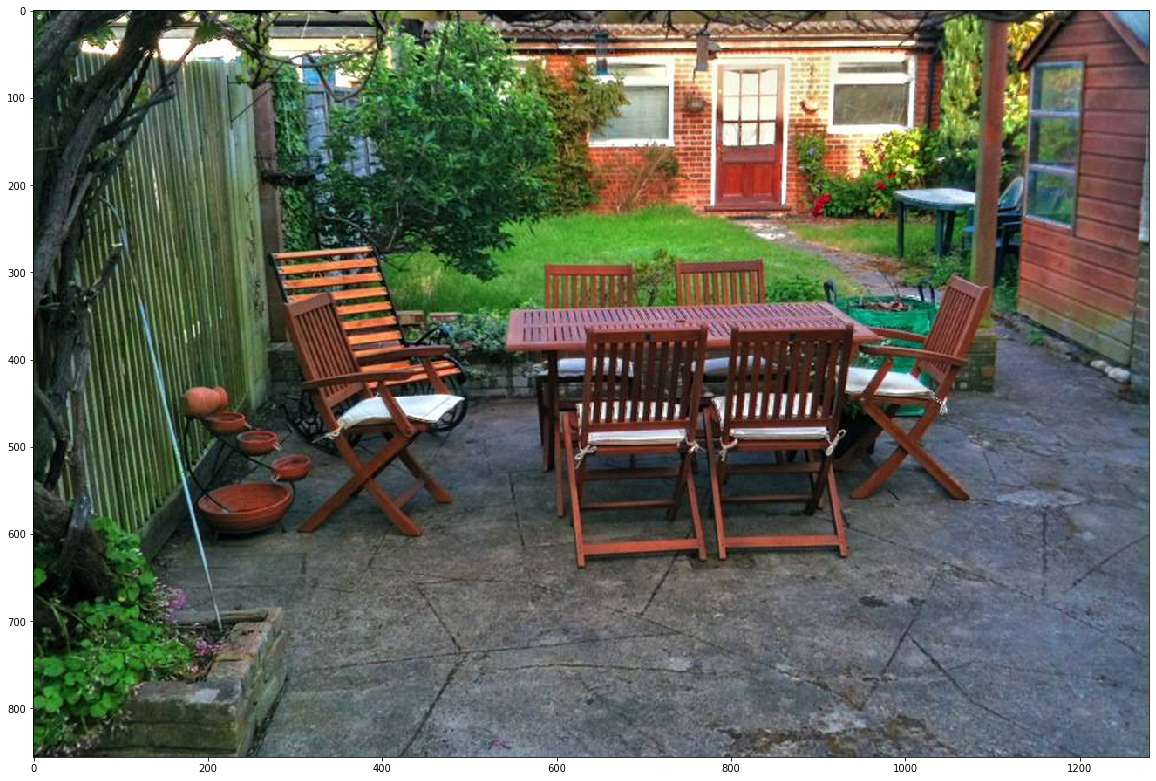

In [4]:
image_url = "https://farm1.staticflickr.com/4032/4653948754_c0d768086b_o.jpg"  
downloaded_image_path = download_and_resize_image(image_url, 1280, 856, True)

In [5]:
models = ["https://tfhub.dev/google/openimages_v4/ssd/mobilenet_v2/1", "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"]
module_handle = models[1]

detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [6]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels = 3)
  return img

In [7]:
def run_detector(detector, path):
  img = load_img(path)

  converted_img  = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
  start_time = time.time()
  result = detector(converted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("Found %d objects." % len(result["detection_scores"]))
  print("Inference time: ", end_time-start_time)
  
  print([(i,j) for (i,j) in zip(result["detection_class_entities"], result["detection_scores"])])

In [8]:
run_detector(detector, downloaded_image_path)

Found 100 objects.
Inference time:  58.505638122558594
[(b'Chair', 0.8885504), (b'Chair', 0.88610023), (b'Chair', 0.8755454), (b'Chair', 0.84246147), (b'Kitchen & dining room table', 0.7166763), (b'Tree', 0.6485184), (b'House', 0.5749406), (b'Chair', 0.52226543), (b'Window', 0.47699285), (b'Tree', 0.43943167), (b'Window', 0.3868264), (b'Table', 0.37312216), (b'Plant', 0.35688198), (b'Plant', 0.31618682), (b'Chair', 0.27307934), (b'Window', 0.22314444), (b'Table', 0.21487275), (b'Window', 0.21486373), (b'Chair', 0.21194352), (b'House', 0.20985177), (b'Bench', 0.20975377), (b'Chair', 0.20842375), (b'Window', 0.19629788), (b'Plant', 0.18867536), (b'Chair', 0.16795412), (b'Chair', 0.16481726), (b'House', 0.16179436), (b'Tree', 0.15583201), (b'Tree', 0.15500517), (b'Tree', 0.14815944), (b'Chair', 0.1457384), (b'Chair', 0.1434472), (b'Plant', 0.1432119), (b'Table', 0.14209692), (b'Tree', 0.13301457), (b'Table', 0.1221681), (b'Chair', 0.11567869), (b'Chair', 0.09876383), (b'Chair', 0.09547798